In [159]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Flatten,  Activation, Conv2D, Dropout, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [161]:
#Check data Type
print ("\ttype(x_train): {}".format(type(train_images)))
print ("\ttype(y_train): {}".format(type(train_labels)))
#check data Shape
print ("\tx_train.shape: {}".format(np.shape(train_images)))
print ("\ty_train.shape: {}".format(np.shape(train_labels)))
print ("\tx_test.shape: {}".format(np.shape(test_images)))
print ("\ty_test.shape: {}".format(np.shape(test_labels)))
#sample data
print ("\ty_train[0]: {}".format(train_labels[0]))

	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (60000, 28, 28)
	y_train.shape: (60000,)
	x_test.shape: (10000, 28, 28)
	y_test.shape: (10000,)
	y_train[0]: 9


In [162]:
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)

In [163]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [164]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

In [165]:
# test and validation set
val_images = test_images[:300]
test_images = test_images[300:]
val_labels = test_labels[:300]
test_labels = test_labels[300:]

In [171]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  # layers.RandomZoom(0.2),
  # layers.RandomContrast(0.2)
])

In [177]:
model = keras.Sequential([
    data_augmentation,
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [179]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

In [180]:
history = model.fit(train_images, train_labels,
          epochs=100, batch_size=256, validation_data = (val_images, val_labels))

Epoch 1/100
235/235 [==============================] - 5s 14ms/step - loss: 1.9235 - accuracy: 0.2827 - val_loss: 1.2111 - val_accuracy: 0.6000
Epoch 2/100
235/235 [==============================] - 3s 13ms/step - loss: 1.3670 - accuracy: 0.4893 - val_loss: 1.0473 - val_accuracy: 0.6333
Epoch 3/100
235/235 [==============================] - 3s 13ms/step - loss: 1.2118 - accuracy: 0.5488 - val_loss: 1.1110 - val_accuracy: 0.6300
Epoch 4/100
235/235 [==============================] - 3s 13ms/step - loss: 1.1103 - accuracy: 0.5877 - val_loss: 0.9223 - val_accuracy: 0.6700
Epoch 5/100
235/235 [==============================] - 3s 13ms/step - loss: 1.0484 - accuracy: 0.6065 - val_loss: 0.8446 - val_accuracy: 0.6933
Epoch 6/100
235/235 [==============================] - 3s 13ms/step - loss: 0.9995 - accuracy: 0.6261 - val_loss: 0.8326 - val_accuracy: 0.7133
Epoch 7/100
235/235 [==============================] - 3s 13ms/step - loss: 0.9648 - accuracy: 0.6429 - val_loss: 0.7573 - val_accuracy:

In [181]:
results = model.evaluate(test_images, test_labels)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

304/304 [==============================] - 1s 4ms/step - loss: 0.4891 - accuracy: 0.8198
Final test set loss: 0.489128
Final test set accuracy: 0.819794


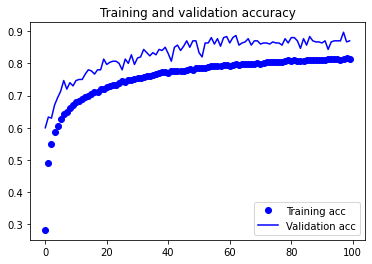

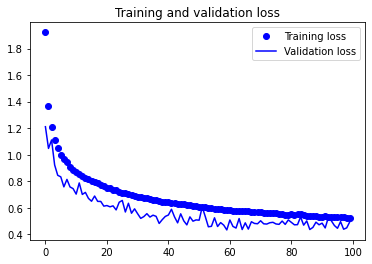

In [182]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()